## Introduction to Deep Learning. Keras Elements

Наблюдаемый эффект от перебора параметров на датасете MNIST:
1. 



In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
tf.set_random_seed(42)

In [14]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11298601394904151492
]


In [12]:
print(keras.__version__)

2.2.4


In [3]:
# Loads train test data
def prepare_mnist(flatten=True, cat=True, slice=60000):
    mnist = tf.keras.datasets.mnist
    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    x_train = x_train/255.0
    x_test = x_test/255.0
    if flatten:
        x_train = x_train.reshape((-1, 784))
        x_test = x_test.reshape((-1, 784))
    if cat:
        y_train = to_categorical(y_train)
        y_test = to_categorical(y_test)
    return x_train[:slice], y_train[:slice], x_test, y_test

# Plots first 25 images
def plotfirst25elems(x,y,size=25):
    o = int(np.sqrt(size))
    if o != np.sqrt(size):
        o += 1
    
    class_names = ['Zero','0ne','Two','Three','Four','Five','Six','Seven','Eight','Nine']
    plt.figure(figsize=(7,7))
    for i in range(size):
        plt.subplot(o,o,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[y[i]])

# Stops training while reaching desirable accuracy 
class oneCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')>0.03):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

#### Обзор параметров для обучения:

- Обучение на выборке из 30 000 элементов
- Обучение до достижения 99% точности
- Лимит на кол-во эпох 5000

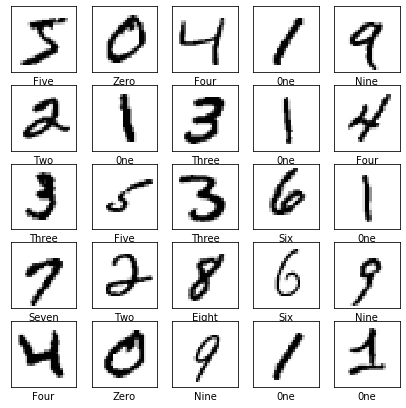

In [4]:
x_train, y_train, x_test, y_test = prepare_mnist(slice=30000)
x, y, xt, yt = prepare_mnist(flatten=False, cat=False)
plotfirst25elems(x, y)

## Теститрование нейросети с разными параметрами

Оценим влияние различных функций активации:

На линейном выпрямителе (relu) модель обучилась до 99% точности за 11 эпох и ~59 секунд

In [114]:
%%time
model = keras.models.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback()
model.fit(x_train,
          y_train,
          epochs=5000,
          callbacks=[callbacks])
print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/5000
30000/30000 [==============================] - 7s 244us/step - loss: 0.3710 - acc: 0.8922
Epoch 2/5000
30000/30000 [==============================] - 5s 169us/step - loss: 0.1707 - acc: 0.9489
Epoch 3/5000
30000/30000 [==============================] - 5s 173us/step - loss: 0.1238 - acc: 0.9625
Epoch 4/5000
30000/30000 [==============================] - 6s 185us/step - loss: 0.0944 - acc: 0.9713
Epoch 5/5000
30000/30000 [==============================] - 5s 173us/step - loss: 0.0729 - acc: 0.9771
Epoch 6/5000
30000/30000 [==============================] - 4s 136us/step - loss: 0.0596 - acc: 0.9814
Epoch 7/5000
30000/30000 [==============================] - 4s 143us/step - loss: 0.0498 - acc: 0.9842
Epoch 8/5000
30000/30000 [==============================] - 4s 133us/step - loss: 0.0423 - acc: 0.9868
Epoch 9/5000
30000/30000 [==============================] - 5s 165us/step - loss: 0.0320 - acc: 0.9896
Epoch 10/5000
30000/30000 [==============================] - 5s 178us/ste

[0.15854372275008355, 0.9616]

#### Relu - одна из простейших функций активации, заменим его распространенную функцию сигмоиды:

Видно, что relu требуется меньше итераций для обучения. Аналогичный результат достиается на 25% медленнее (15 эпох), отработка 79 секунд.

In [117]:
%%time
model = keras.models.Sequential([
    keras.layers.Dense(64, activation=tf.nn.sigmoid),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback()
model.fit(x_train,
          y_train,
          epochs=5000,
          callbacks=[callbacks])
print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/5000
30000/30000 [==============================] - 8s 253us/step - loss: 0.8027 - acc: 0.8123
Epoch 2/5000
30000/30000 [==============================] - 5s 173us/step - loss: 0.2736 - acc: 0.9238
Epoch 3/5000
30000/30000 [==============================] - 5s 173us/step - loss: 0.2041 - acc: 0.9407
Epoch 4/5000
30000/30000 [==============================] - 5s 171us/step - loss: 0.1649 - acc: 0.9520
Epoch 5/5000
30000/30000 [==============================] - 5s 163us/step - loss: 0.1357 - acc: 0.9599
Epoch 6/5000
30000/30000 [==============================] - 4s 133us/step - loss: 0.1147 - acc: 0.9674
Epoch 7/5000
30000/30000 [==============================] - 5s 172us/step - loss: 0.0982 - acc: 0.9715
Epoch 8/5000
30000/30000 [==============================] - 5s 166us/step - loss: 0.0839 - acc: 0.9761
Epoch 9/5000
30000/30000 [==============================] - 5s 170us/step - loss: 0.0722 - acc: 0.9795
Epoch 10/5000
30000/30000 [==============================] - 5s 174us/ste

[0.12349359437096864, 0.9639]

#### Гиперболический тангенс считается отличной функцией активации для входного слоя.

В результате модель быстрее обучилась, потребовалось 9 эпох, модель обучилась за 50 секунд. При этом качество обучения на тесте оставалось практически постоянным для каждого из рассмотренных

In [9]:
%%time
model = keras.models.Sequential([
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback() 
model.fit(x_train,
          y_train,
          epochs=5000,
          callbacks=[callbacks])

print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/5000
30000/30000 [==============================] - 4s 145us/step - loss: 0.3607 - acc: 0.8994
Epoch 2/5000
30000/30000 [==============================] - 3s 115us/step - loss: 0.1739 - acc: 0.9486
Epoch 3/5000
30000/30000 [==============================] - 3s 116us/step - loss: 0.1277 - acc: 0.9620
Epoch 4/5000
30000/30000 [==============================] - 4s 129us/step - loss: 0.0945 - acc: 0.9719
Epoch 5/5000
30000/30000 [==============================] - 4s 129us/step - loss: 0.0735 - acc: 0.9772
Epoch 6/5000
30000/30000 [==============================] - 4s 139us/step - loss: 0.0574 - acc: 0.9835
Epoch 7/5000
30000/30000 [==============================] - 4s 128us/step - loss: 0.0453 - acc: 0.9869
Epoch 8/5000
30000/30000 [==============================] - 4s 132us/step - loss: 0.0338 - acc: 0.9906
Epoch 9/5000
30000/30000 [==============================] - 4s 129us/step - loss: 0.0304 - acc: 0.9917
Epoch 10/5000
30000/30000 [==============================] - 4s 132us/ste

[0.12149570654020644, 0.9656]

#### Добавление слоев
Добавление 6 дополнительных слоев увеличило сложность модели и скорость работы без особенного изменения в качестве. Данные достаточно просты, увеличение слоев избыточно

In [13]:
%%time
model = keras.models.Sequential([
    keras.layers.Dense(784, activation=tf.nn.tanh),
    keras.layers.Dense(672, activation=tf.nn.tanh),
    keras.layers.Dense(560, activation=tf.nn.tanh),
    keras.layers.Dense(450, activation=tf.nn.tanh),
    keras.layers.Dense(340, activation=tf.nn.tanh),
    keras.layers.Dense(230, activation=tf.nn.tanh),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback()
model.fit(x_train,
          y_train,
          epochs=100,
          callbacks=[callbacks])
print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/100
30000/30000 [==============================] - 19s 638us/step - loss: 0.4282 - acc: 0.8762
Epoch 2/100
30000/30000 [==============================] - 18s 587us/step - loss: 0.2618 - acc: 0.9259
Epoch 3/100
30000/30000 [==============================] - 18s 601us/step - loss: 0.2096 - acc: 0.94032s - loss: 0.2077
Epoch 4/100
30000/30000 [==============================] - 18s 612us/step - loss: 0.1775 - acc: 0.9487
Epoch 5/100
30000/30000 [==============================] - 18s 613us/step - loss: 0.1520 - acc: 0.9560
Epoch 6/100
30000/30000 [==============================] - 18s 614us/step - loss: 0.1407 - acc: 0.9600
Epoch 7/100
30000/30000 [==============================] - 18s 613us/step - loss: 0.1258 - acc: 0.9642
Epoch 8/100
30000/30000 [==============================] - 19s 619us/step - loss: 0.1130 - acc: 0.96740s - loss: 0.113
Epoch 9/100
30000/30000 [==============================] - 20s 654us/step - loss: 0.1037 - acc: 0.9702
Epoch 10/100
30000/30000 [==============

[0.178342654052563, 0.9615]

#### Снижение числа слоев
Снижение слоев до 2-х сократило время обработки без ухудшения качества.

In [14]:
%%time
model = keras.models.Sequential([
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback()
model.fit(x_train,
          y_train,
          epochs=5000,
          callbacks=[callbacks])
print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/5000
30000/30000 [==============================] - 5s 170us/step - loss: 0.3888 - acc: 0.8924
Epoch 2/5000
30000/30000 [==============================] - 4s 123us/step - loss: 0.2055 - acc: 0.9408
Epoch 3/5000
30000/30000 [==============================] - 4s 122us/step - loss: 0.1543 - acc: 0.9551
Epoch 4/5000
30000/30000 [==============================] - 4s 121us/step - loss: 0.1225 - acc: 0.9648
Epoch 5/5000
30000/30000 [==============================] - 4s 120us/step - loss: 0.1000 - acc: 0.9717
Epoch 6/5000
30000/30000 [==============================] - 3s 112us/step - loss: 0.0822 - acc: 0.9778
Epoch 7/5000
30000/30000 [==============================] - 3s 114us/step - loss: 0.0680 - acc: 0.9816
Epoch 8/5000
30000/30000 [==============================] - 4s 122us/step - loss: 0.0570 - acc: 0.9851
Epoch 9/5000
30000/30000 [==============================] - 4s 120us/step - loss: 0.0479 - acc: 0.9882
Epoch 10/5000
30000/30000 [==============================] - 3s 112us/ste

[0.11404674614295364, 0.9656]

#### Оценка влияния размера батча на обучении
Сокращает время обработки одной эпохи, увеличивает количество проходов для достижение аналогичной результата. На текущих данных, увеличивает быстродействие модели

In [26]:
%%time
model = keras.models.Sequential([
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback()
model.fit(x_train,
          y_train,
          epochs=30,
          batch_size=50,
          callbacks=[callbacks])
print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/30
30000/30000 [==============================] - 5s 166us/step - loss: 0.3740 - acc: 0.8928
Epoch 2/30
30000/30000 [==============================] - 3s 105us/step - loss: 0.1795 - acc: 0.9473
Epoch 3/30
30000/30000 [==============================] - 3s 103us/step - loss: 0.1257 - acc: 0.9629
Epoch 4/30
30000/30000 [==============================] - 3s 105us/step - loss: 0.0926 - acc: 0.9725
Epoch 5/30
30000/30000 [==============================] - 3s 106us/step - loss: 0.0672 - acc: 0.9800
Epoch 6/30
30000/30000 [==============================] - 3s 103us/step - loss: 0.0529 - acc: 0.9849
Epoch 7/30
30000/30000 [==============================] - 3s 113us/step - loss: 0.0396 - acc: 0.9893
Epoch 8/30
30000/30000 [==============================] - 4s 119us/step - loss: 0.0304 - acc: 0.9921
Epoch 9/30
30000/30000 [==============================] - 4s 124us/step - loss: 0.0213 - acc: 0.9951

Reached 99% accuracy so cancelling training!
Model evaluate
10000/10000 [=================

[0.09585594695070758, 0.9721]

In [27]:
%%time
model = keras.models.Sequential([
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback()
model.fit(x_train,
          y_train,
          epochs=30,
          batch_size=1000,
          callbacks=[callbacks])
print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/30
30000/30000 [==============================] - 3s 94us/step - loss: 1.0077 - acc: 0.7325
Epoch 2/30
30000/30000 [==============================] - 1s 26us/step - loss: 0.4070 - acc: 0.8930
Epoch 3/30
30000/30000 [==============================] - 1s 27us/step - loss: 0.3156 - acc: 0.9141
Epoch 4/30
30000/30000 [==============================] - 1s 28us/step - loss: 0.2725 - acc: 0.9252
Epoch 5/30
30000/30000 [==============================] - 1s 27us/step - loss: 0.2436 - acc: 0.9321
Epoch 6/30
30000/30000 [==============================] - 1s 29us/step - loss: 0.2212 - acc: 0.9383
Epoch 7/30
30000/30000 [==============================] - 1s 27us/step - loss: 0.2007 - acc: 0.9439
Epoch 8/30
30000/30000 [==============================] - 1s 27us/step - loss: 0.1837 - acc: 0.9492
Epoch 9/30
30000/30000 [==============================] - 1s 27us/step - loss: 0.1682 - acc: 0.9535
Epoch 10/30
30000/30000 [==============================] - 1s 26us/step - loss: 0.1551 - acc: 0.9563

[0.10603048442732543, 0.9702]

#### Оценка возможности 100% обучения
Обучение до 100% результата на тренеровочных данных ведет к запоминанию результатов, не увеличивая качество на тесте, чем больше размеченных данных для обучения, тем выше точность на тесте 

In [30]:
%%time
x_train, y_train, x_test, y_test = prepare_mnist(slice=60000)
model = keras.models.Sequential([
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback()
model.fit(x_train,
          y_train,
          epochs=30)
print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/30
60000/60000 [==============================] - 9s 155us/step - loss: 0.3143 - acc: 0.9119
Epoch 2/30
60000/60000 [==============================] - 8s 132us/step - loss: 0.1603 - acc: 0.9529
Epoch 3/30
60000/60000 [==============================] - 8s 132us/step - loss: 0.1181 - acc: 0.9660
Epoch 4/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0939 - acc: 0.9730
Epoch 5/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.0760 - acc: 0.9780
Epoch 6/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.0631 - acc: 0.9818
Epoch 7/30
60000/60000 [==============================] - 7s 118us/step - loss: 0.0533 - acc: 0.9849
Epoch 8/30
60000/60000 [==============================] - 8s 129us/step - loss: 0.0455 - acc: 0.9874
Epoch 9/30
60000/60000 [==============================] - 8s 134us/step - loss: 0.0391 - acc: 0.9887
Epoch 10/30
60000/60000 [==============================] - 9s 142us/step - loss: 0.0336 - a

[0.1223906021032999, 0.9727]

In [32]:
config = model.get_config()
config

{'name': 'sequential_19',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_62',
    'trainable': True,
    'units': 64,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_63',
    'trainable': True,
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias

#### Обертка модели в класс


In [45]:
class MnistNet(keras.Model):

    def __init__(self, use_bn=False, use_dp=False, num_classes=10):
        super(MnistNet, self).__init__(name='mnist')
        self.use_bn = use_bn
        self.use_dp = use_dp
        self.num_classes = num_classes

        self.dense1 = keras.layers.Dense(64, activation='tanh')
        self.dense2 = keras.layers.Dense(64, activation='tanh')
        self.dense3 = keras.layers.Dense(num_classes, activation='softmax')
        if self.use_dp:
            self.dp = keras.layers.Dropout(0.5)
        if self.use_bn:
            self.bn = keras.layers.BatchNormalization(axis=-1)

    def call(self, inputs):
        x = self.dense1(inputs)
        if self.use_dp:
            x = self.dp(x)
        if self.use_bn:
            x = self.bn(x)       
        x = self.dense2(x)
        if self.use_dp:
            x = self.dp(x)
        if self.use_bn:
            x = self.bn(x)
        return self.dense3(x)

model = MnistNet()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback()
model.fit(x_train,
          y_train,
          epochs=30,
          callbacks=[callbacks])
print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/30
30000/30000 [==============================] - 7s 239us/step - loss: 0.3685 - acc: 0.8965
Epoch 2/30
30000/30000 [==============================] - 5s 150us/step - loss: 0.1760 - acc: 0.9480
Epoch 3/30
30000/30000 [==============================] - 4s 148us/step - loss: 0.1250 - acc: 0.9631
Epoch 4/30
30000/30000 [==============================] - 4s 147us/step - loss: 0.0951 - acc: 0.9714
Epoch 5/30
30000/30000 [==============================] - 4s 148us/step - loss: 0.0712 - acc: 0.9781
Epoch 6/30
30000/30000 [==============================] - 5s 153us/step - loss: 0.0556 - acc: 0.9838
Epoch 7/30
30000/30000 [==============================] - 5s 152us/step - loss: 0.0435 - acc: 0.9870
Epoch 8/30
30000/30000 [==============================] - 5s 152us/step - loss: 0.0343 - acc: 0.9896
Epoch 9/30
30000/30000 [==============================] - 4s 144us/step - loss: 0.0287 - acc: 0.9912

Reached 99% accuracy so cancelling training!
Model evaluate
10000/10000 [=================

[0.1090335748577956, 0.9686]

Использование dropout показало снижение скорости обучения.  Т.к. предыдущие модели не обнаружили высокую переобучаемость, поэтому использование dropout избыточно для MNIST:

In [46]:
model = MnistNet(use_dp=True) # Использует dropout
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback()
model.fit(x_train,
          y_train,
          epochs=30,
          callbacks=[callbacks])
print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/30
30000/30000 [==============================] - 8s 269us/step - loss: 0.7016 - acc: 0.7812
Epoch 2/30
30000/30000 [==============================] - 5s 169us/step - loss: 0.4574 - acc: 0.8638
Epoch 3/30
30000/30000 [==============================] - 5s 172us/step - loss: 0.4046 - acc: 0.8828
Epoch 4/30
30000/30000 [==============================] - 5s 172us/step - loss: 0.3789 - acc: 0.8880
Epoch 5/30
30000/30000 [==============================] - 5s 167us/step - loss: 0.3518 - acc: 0.8970
Epoch 6/30
30000/30000 [==============================] - 5s 180us/step - loss: 0.3384 - acc: 0.9004
Epoch 7/30
30000/30000 [==============================] - 5s 178us/step - loss: 0.3326 - acc: 0.9026
Epoch 8/30
30000/30000 [==============================] - 5s 176us/step - loss: 0.3162 - acc: 0.9073
Epoch 9/30
30000/30000 [==============================] - 5s 160us/step - loss: 0.3078 - acc: 0.9101
Epoch 10/30
30000/30000 [==============================] - 5s 167us/step - loss: 0.3064 - a

[0.16953961204253137, 0.9526]

In [57]:
model = MnistNet()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
callbacks = oneCallback()
model.fit(x_train,
          y_train,
          epochs=10,
          callbacks=[callbacks],
          steps_per_epoch=10)
print('Model evaluate')
model.evaluate(x_test, y_test)

Epoch 1/10
10/10 [==============================] - 6s 599ms/step - loss: 1.8051 - acc: 0.4721
Epoch 2/10
10/10 [==============================] - 3s 332ms/step - loss: 1.0545 - acc: 0.7672
Epoch 3/10
10/10 [==============================] - 3s 304ms/step - loss: 0.7332 - acc: 0.8317
Epoch 4/10
10/10 [==============================] - 3s 309ms/step - loss: 0.5690 - acc: 0.8643
Epoch 5/10
10/10 [==============================] - 3s 317ms/step - loss: 0.4735 - acc: 0.8823
Epoch 6/10
10/10 [==============================] - 3s 323ms/step - loss: 0.4136 - acc: 0.8934
Epoch 7/10
10/10 [==============================] - 3s 300ms/step - loss: 0.3727 - acc: 0.9023
Epoch 8/10
10/10 [==============================] - 3s 322ms/step - loss: 0.3425 - acc: 0.9089
Epoch 9/10
10/10 [==============================] - 3s 305ms/step - loss: 0.3190 - acc: 0.9138
Epoch 10/10
10/10 [==============================] - 3s 304ms/step - loss: 0.2998 - acc: 0.9185
Model evaluate
10000/10000 [=====================

[0.2990068607926369, 0.92]

#### CNN. Добавление сверточных слоев 

Меняем размерность данных, меняем loss на 'sparse_categorical_crossentropy'
Модель достигает высоких результатов на первых итерациях с более высоким качеством на тесте

In [92]:
x_train, y_train, x_test, y_test = prepare_mnist(slice=30000, flatten=False, cat=False)
x_train=x_train.reshape(30000, 28, 28, 1)
x_test=x_test.reshape(10000, 28, 28, 1)

In [103]:
%%time
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

callbacks = oneCallback() 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,
          y_train, 
          epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10
30000/30000 [==============================] - 22s 722us/sample - loss: 0.1891 - acc: 0.9424
Epoch 2/10
30000/30000 [==============================] - 22s 742us/sample - loss: 0.0600 - acc: 0.9813
Epoch 3/10
30000/30000 [==============================] - 23s 752us/sample - loss: 0.0397 - acc: 0.9874
Epoch 4/10
30000/30000 [==============================] - 22s 737us/sample - loss: 0.0298 - acc: 0.9899
Epoch 5/10
30000/30000 [==============================] - 23s 755us/sample - loss: 0.0193 - acc: 0.9937
Epoch 6/10
30000/30000 [==============================] - 21s 715us/sample - loss: 0.0168 - acc: 0.9943 - loss: 0.0168 - acc:
Epoch 7/10
30000/30000 [==============================] - 26s 883us/sample - loss: 0.0137 - acc: 0.9957 - loss: 0.0138 - acc: 0. - ETA: 0s - loss: 0.0
Epoch 8/10
30000/30000 [==============================] - 22s 734us/sample - loss: 0.0088 - acc: 0.9968
Epoch 9/10
30000/30000 [==============================] - 21s 697us/sample - loss: 0.0099 - acc: 0.

[0.05241489401019353, 0.9876]

In [104]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total para

####  Conv LSTM example

Train on 950 samples, validate on 50 samples
Epoch 1/3
950/950 [==============================] - 977s 1s/step - loss: 0.2566 - val_loss: 0.0701
Epoch 2/3
950/950 [==============================] - 591s 623ms/step - loss: 0.0248 - val_loss: 0.0176
Epoch 3/3
950/950 [==============================] - 686s 722ms/step - loss: 0.0048 - val_loss: 0.0057


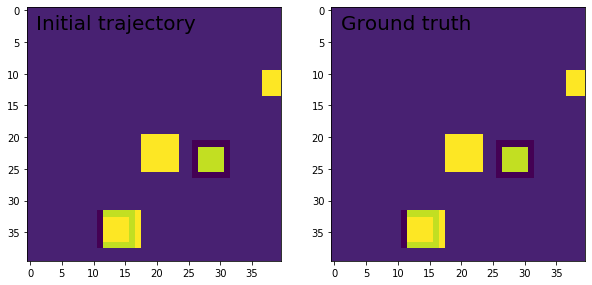

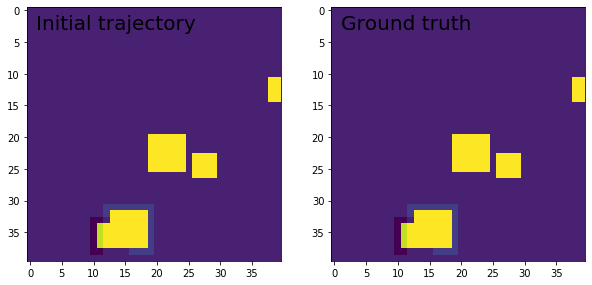

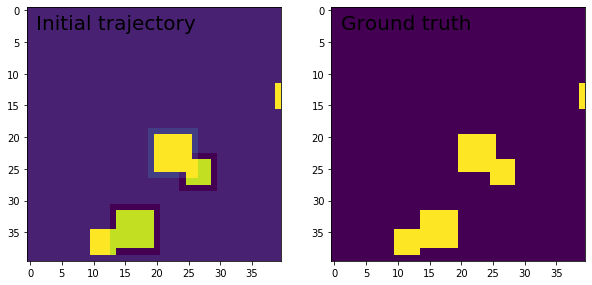

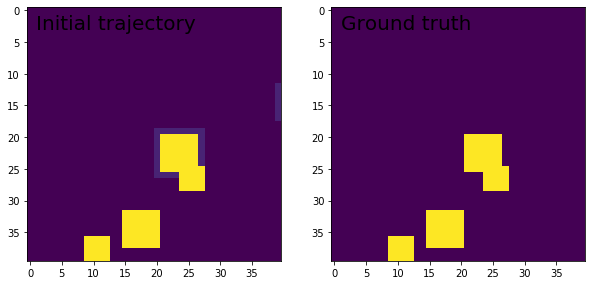

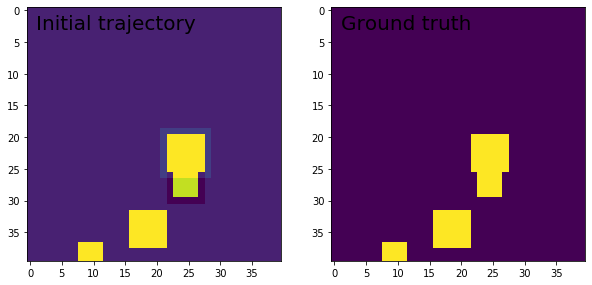

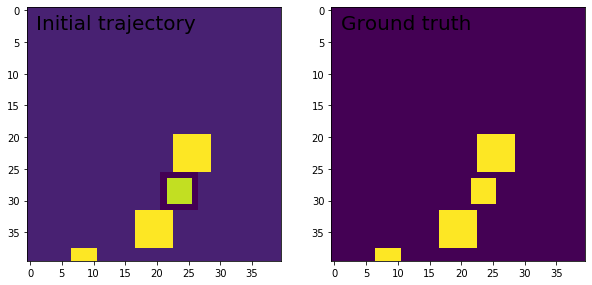

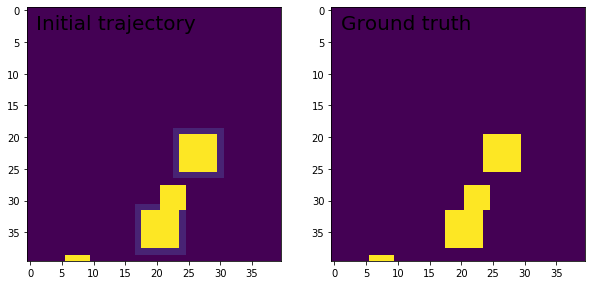

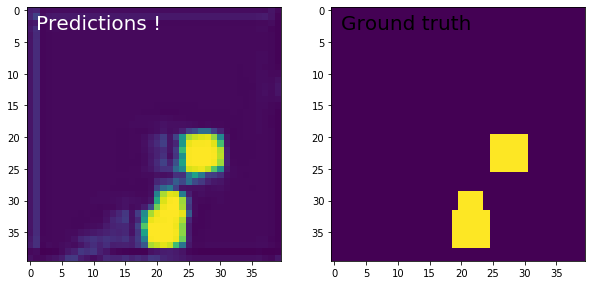

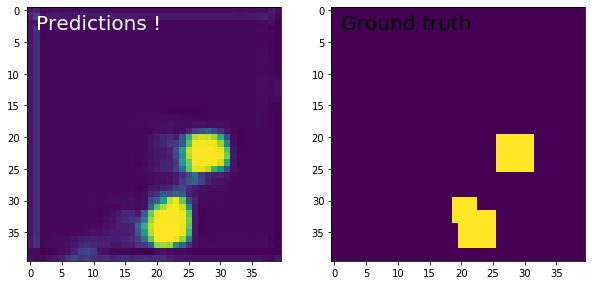

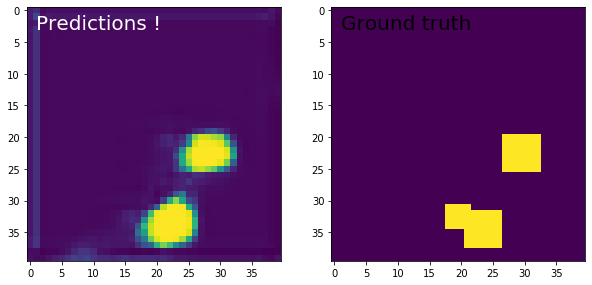

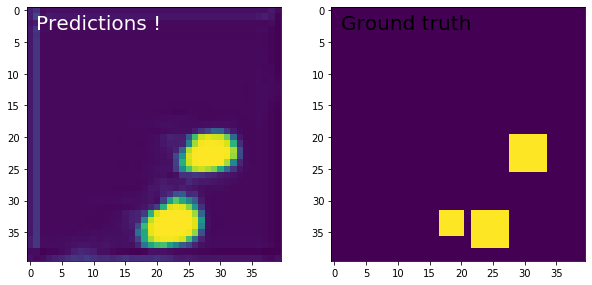

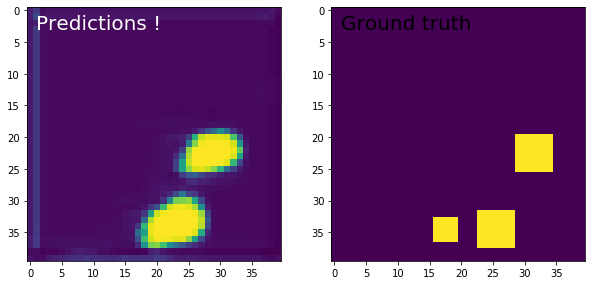

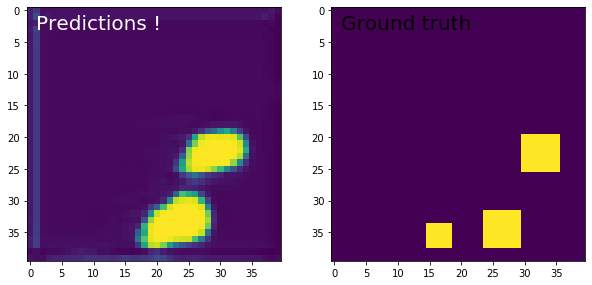

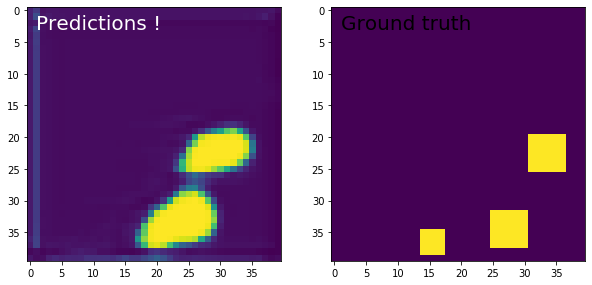

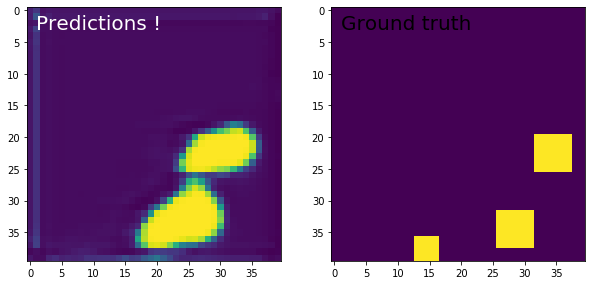

In [6]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=3, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))